In [154]:
import pandas as pd
import DataLoading
from torch.utils.data import DataLoader,TensorDataset
import torch
import matplotlib.pyplot as plt
import NN_classes

In [155]:
def trim_columns_to_common(df_inter_j):
    common_columns = list(set.intersection(*(set(df.columns) for df in dfs_inter_j.values())))
    # Filter DataFrames to keep only common columns
    filtered_dataframes_dict = {name: df[common_columns] for name, df in df_inter_j.items()}
    return filtered_dataframes_dict

In [156]:
sc = "sc01"
period = "2030"
folder = "../Data/RTS24_AC_12w_ext_o_dummy"
te_s = 0.1
val_s = 0.2
executions = DataLoading.list_executions(period,sc,folder)


dfs_in,dfs_out,dfs_inter = DataLoading.load_data_ext_out(folder,executions,period,sc,["PowerOutput"])
dfs_inter_j = DataLoading.join_frames_inter_layer(dfs_inter)
dfs_inter_j = trim_columns_to_common(dfs_inter_j)
ts_in,ts_out,ts_inter = DataLoading.split_tr_val_te_ext_out(dfs_in,dfs_out,dfs_inter_j,executions,te_s,val_s)
d_ft_in, d_ft_out,d_ft_inter = DataLoading.concat_and_normalize_ext_out(ts_in,ts_out,ts_inter,executions)

input_f_sc01_Network_Existing_Generation_Full_2030.csv
86
input_f_sc01_Network_Line_In_N_101_N_102_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_101_N_103_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_101_N_105_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_102_N_104_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_102_N_106_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_103_N_109_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_103_N_124_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_104_N_109_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_105_N_110_cac1_2030.csv
86


In [157]:
train = TensorDataset(d_ft_in['train'].float(), d_ft_out['train'].float())
validation = TensorDataset(d_ft_in['val'].float(), d_ft_out['val'].float())

In [168]:
class ObjectiveEstimator_ANN_inter_0_0(torch.nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_ratio=0.0,relu_out = False ):
        super().__init__()
        hidden_size1 = hidden_sizes[0]
        print(hidden_size1)
        print(output_size)
        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size1)
        self.dropout = torch.nn.Dropout(dropout_ratio)
        self.output_layer = torch.nn.Linear(hidden_size1, output_size)
        self.relu_out = relu_out

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def forward(self, input):
        hidden1 = torch.relu(self.hidden_layer1(input))
        hidden1_dropout = self.dropout(hidden1)
        if (self.relu_out):
            output = torch.relu(self.output_layer(hidden1_dropout))
        else:
            output = self.output_layer(hidden1_dropout)
        return output,hidden1
    

    
class ObjectiveEstimator_ANN_inter_1_0(torch.nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_ratio=0.,relu_out = False):
        super().__init__()
        hidden_size1 = hidden_sizes[0]
        hidden_size2 = hidden_sizes[1]
        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size1)
        self.hidden_layer2 = torch.nn.Linear(hidden_size1, hidden_size2)
        self.dropout = torch.nn.Dropout(dropout_ratio)
        self.output_layer = torch.nn.Linear(hidden_size2, output_size)

        self.relu_out = relu_out
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def forward(self, input):
        hidden1 = torch.relu(self.hidden_layer1(input))
        hidden1_dropout = self.dropout(hidden1)
        hidden2 = torch.relu(self.hidden_layer2(hidden1_dropout))
        hidden2_dropout = self.dropout(hidden2)
        if (self.relu_out):
            output = torch.relu(self.output_layer(hidden2_dropout))
        else:
            output = self.output_layer(hidden2_dropout)
        return output,hidden2


class ObjectiveEstimator_ANN_inter_2_0(torch.nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_ratio=0.0,relu_out =False):
        super().__init__()
        hidden_size1 = hidden_sizes[0]
        hidden_size2 = hidden_sizes[1]
        hidden_size3 = hidden_sizes[2]
        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size1)
        self.hidden_layer2 = torch.nn.Linear(hidden_size1, hidden_size2)
        self.hidden_layer3 = torch.nn.Linear(hidden_size2, hidden_size3)
        self.dropout = torch.nn.Dropout(dropout_ratio)
        self.output_layer = torch.nn.Linear(hidden_size3, output_size)
        self.relu_out = relu_out

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def forward(self, input):
        hidden1 = torch.relu(self.hidden_layer1(input))
        hidden1_dropout = self.dropout(hidden1)
        hidden2 = torch.relu(self.hidden_layer2(hidden1_dropout))
        hidden2_dropout = self.dropout(hidden2)
        hidden3 = torch.relu(self.hidden_layer3(hidden2_dropout))
        hidden3_dropout = self.dropout(hidden3)

        if (self.relu_out):
            output = torch.relu(self.output_layer(hidden3_dropout))
        else:
            output = self.output_layer(hidden3_dropout)
        return output,hidden3
    
class ObjectiveEstimator_ANN_inter_3_0(torch.nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_ratio=0.0,relu_out =False):
        super().__init__()
        hidden_size1 = hidden_sizes[0]
        hidden_size2 = hidden_sizes[1]
        hidden_size3 = hidden_sizes[2]
        hidden_size4 = hidden_sizes[3]

        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size1)
        self.hidden_layer2 = torch.nn.Linear(hidden_size1, hidden_size2)
        self.hidden_layer3 = torch.nn.Linear(hidden_size2, hidden_size3)
        self.hidden_layer4 = torch.nn.Linear(hidden_size3, hidden_size4)

        self.dropout = torch.nn.Dropout(dropout_ratio)
        self.output_layer = torch.nn.Linear(hidden_size3, output_size)
        self.relu_out = relu_out

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def forward(self, input):
        hidden1 = torch.relu(self.hidden_layer1(input))
        hidden1_dropout = self.dropout(hidden1)
        hidden2 = torch.relu(self.hidden_layer2(hidden1_dropout))
        hidden2_dropout = self.dropout(hidden2)
        hidden3 = torch.relu(self.hidden_layer3(hidden2_dropout))
        hidden3_dropout = self.dropout(hidden3)
        hidden4 = torch.relu(self.hidden_layer4(hidden3_dropout))


        if (self.relu_out):
            output = torch.relu(self.output_layer(hidden4_dropout))
        else:
            output = self.output_layer(hidden4_dropout)
        return output,hidden4

class ObjectiveEstimator_ANN_inter_3_1(torch.nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_ratio=0.0,relu_out =False):
        super().__init__()
        hidden_size1 = hidden_sizes[0]
        hidden_size2 = hidden_sizes[1]
        hidden_size3 = hidden_sizes[2]
        hidden_size4 = hidden_sizes[3]
        hidden_size5 = hidden_sizes[4]

        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size1)
        self.hidden_layer2 = torch.nn.Linear(hidden_size1, hidden_size2)
        self.hidden_layer3 = torch.nn.Linear(hidden_size2, hidden_size3)
        self.hidden_layer4 = torch.nn.Linear(hidden_size3, hidden_size4)
        self.hidden_layer5 = torch.nn.Linear(hidden_size4, hidden_size5)

        self.dropout = torch.nn.Dropout(dropout_ratio)
        self.output_layer = torch.nn.Linear(hidden_size5, output_size)
        self.relu_out = relu_out

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def forward(self, input):
        hidden1 = torch.relu(self.hidden_layer1(input))
        hidden1_dropout = self.dropout(hidden1)
        hidden2 = torch.relu(self.hidden_layer2(hidden1_dropout))
        hidden2_dropout = self.dropout(hidden2)
        hidden3 = torch.relu(self.hidden_layer3(hidden2_dropout))
        hidden3_dropout = self.dropout(hidden3)
        hidden4 = torch.relu(self.hidden_layer4(hidden3_dropout))
        hidden4_dropout = self.dropout(hidden4)
        hidden5 = torch.relu(self.hidden_layer5(hidden4_dropout))
        hidden5_dropout = self.dropout(hidden5)


        if (self.relu_out):
            output = torch.relu(self.output_layer(hidden5_dropout))
        else:
            output = self.output_layer(hidden5_dropout)
        return output,hidden4

class ObjectiveEstimator_ANN_inter_3_2(torch.nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_ratio=0.0,relu_out =False):
        super().__init__()
        hidden_size1 = hidden_sizes[0]
        hidden_size2 = hidden_sizes[1]
        hidden_size3 = hidden_sizes[2]
        hidden_size4 = hidden_sizes[3]
        hidden_size5 = hidden_sizes[4]
        hidden_size6 = hidden_sizes[5]

        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size1)
        self.hidden_layer2 = torch.nn.Linear(hidden_size1, hidden_size2)
        self.hidden_layer3 = torch.nn.Linear(hidden_size2, hidden_size3)
        self.hidden_layer4 = torch.nn.Linear(hidden_size3, hidden_size4)
        self.hidden_layer5 = torch.nn.Linear(hidden_size4, hidden_size5)
        self.hidden_layer6 = torch.nn.Linear(hidden_size5, hidden_size6)

        self.dropout = torch.nn.Dropout(dropout_ratio)
        self.output_layer = torch.nn.Linear(hidden_size5, output_size)
        self.relu_out = relu_out

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def forward(self, input):
        hidden1 = torch.relu(self.hidden_layer1(input))
        hidden1_dropout = self.dropout(hidden1)
        hidden2 = torch.relu(self.hidden_layer2(hidden1_dropout))
        hidden2_dropout = self.dropout(hidden2)
        hidden3 = torch.relu(self.hidden_layer3(hidden2_dropout))
        hidden3_dropout = self.dropout(hidden3)
        hidden4 = torch.relu(self.hidden_layer4(hidden3_dropout))
        hidden4_dropout = self.dropout(hidden4)
        hidden5 = torch.relu(self.hidden_layer5(hidden4_dropout))
        hidden5_dropout = self.dropout(hidden5)
        hidden6 = torch.relu(self.hidden_layer6(hidden5_dropout))
        hidden6_dropout = self.dropout(hidden6)


        if (self.relu_out):
            output = torch.relu(self.output_layer(hidden6_dropout))
        else:
            output = self.output_layer(hidden6_dropout)
        return output,hidden4
    
    

import torch.nn.functional as F

def custom_loss(output, target_output, hidden_layer_representation, target_hidden, alpha=0.0,beta = 1):
    # Compute the standard loss (e.g., mean squared error) for the output layer
    standard_loss = F.mse_loss(output.squeeze(), target_output)

    # Compute a loss term based on the hidden layer representation and its target
    hidden_loss = F.mse_loss(hidden_layer_representation, target_hidden)

    # Combine the two loss terms with a weighting factor alpha
    total_loss = beta*standard_loss + alpha * hidden_loss

    return total_loss


In [164]:
train = TensorDataset(d_ft_in['train'].float(), d_ft_out['train'].float(),d_ft_inter['train'])
validation = TensorDataset(d_ft_in['val'].float(), d_ft_out['val'].float(),d_ft_inter['val'].float())

training_loader = DataLoader(train,batch_size=64)
#validation_loader = DataLoader(validation,batch_size=64)

num_epochs = 20
learning_rate = 0.0001
inp_size = train.tensors[0].shape[1]
inter_size = train.tensors[2].shape[1]
output_size = 1

In [167]:
criterion = custom_loss  # Use your custom loss function

model = ObjectiveEstimator_ANN_inter_2_0(inp_size,[50,25,inter_size],output_size)
model_o = NN_classes.ObjectiveEstimator_ANN_3hidden_layer(inp_size,[50,25,inter_size],output_size)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer_o = torch.optim.Adam(model_o.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for inputs, targets, target_hidden in training_loader:
        optimizer.zero_grad()
        optimizer_o.zero_grad()
        
        outputs, hidden_representation = model(inputs)
        outputs_o = model_o(inputs)
        
        loss = criterion(outputs.float(), targets.float(), hidden_representation.float(), target_hidden.float(),alpha = 0,beta = 1)
        loss_o = F.mse_loss(outputs_o.squeeze(), targets.float())

        loss.backward()
        loss_o.backward()
        
        optimizer.step()
        optimizer_o.step()
    print(loss,loss_o)

tensor(2.8642e-06, grad_fn=<AddBackward0>) tensor(2.8485e-06, grad_fn=<MseLossBackward0>)
tensor(3.8328e-06, grad_fn=<AddBackward0>) tensor(4.6101e-06, grad_fn=<MseLossBackward0>)
tensor(2.4596e-06, grad_fn=<AddBackward0>) tensor(4.5871e-06, grad_fn=<MseLossBackward0>)
tensor(1.7208e-06, grad_fn=<AddBackward0>) tensor(3.8803e-06, grad_fn=<MseLossBackward0>)
tensor(1.6676e-06, grad_fn=<AddBackward0>) tensor(3.6790e-06, grad_fn=<MseLossBackward0>)
tensor(1.6046e-06, grad_fn=<AddBackward0>) tensor(3.1458e-06, grad_fn=<MseLossBackward0>)
tensor(1.3805e-06, grad_fn=<AddBackward0>) tensor(2.5700e-06, grad_fn=<MseLossBackward0>)
tensor(1.2429e-06, grad_fn=<AddBackward0>) tensor(2.0426e-06, grad_fn=<MseLossBackward0>)
tensor(1.0693e-06, grad_fn=<AddBackward0>) tensor(1.8553e-06, grad_fn=<MseLossBackward0>)
tensor(9.2619e-07, grad_fn=<AddBackward0>) tensor(1.9139e-06, grad_fn=<MseLossBackward0>)
tensor(8.7829e-07, grad_fn=<AddBackward0>) tensor(2.0694e-06, grad_fn=<MseLossBackward0>)
tensor(8.8

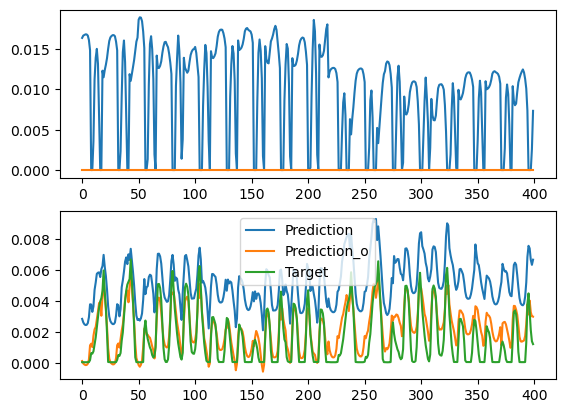

In [169]:
#Inspection of test results:
s = "test"
ex = "Network_Existing_Generation_Full"
costs_target,power_target = d_ft_out[s],d_ft_inter[s]
costs_pred,power_pred = model(d_ft_in[s].float())
costs_pred_o = model_o(d_ft_in[s].float())
i=4
s=1
e=s+400

fig,axs = plt.subplots(2,1)
axs[0].plot(power_pred[s:e,i].detach(),label = "Prediction")
axs[0].plot(power_target[s:e,i],label = "Target")

axs[1].plot(costs_pred[s:e].detach(),label = "Prediction")
axs[1].plot(costs_pred_o[s:e].detach(),label = "Prediction_o")
axs[1].plot(costs_target[s:e],label = "Target")
plt.legend()